# 실습1

In [1]:
import urllib.request
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
plt.rc('font', family ='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #마이너스 기호 깨짐 방지

In [2]:
while True:
    # 검색하는 입력부
    search_word = input("검색어를 입력하세요: ") 
    sort = input("검색 결과 정렬 방법을 입력하세요(1:정확도순, 2:최신순) ") ; print()
    
    # 이상한 값이 검색되었을때 예외처리
    if sort == '1' : sort = 'sim' ; break
    elif sort == '2' : sort = 'date' ; break
    else : print("정렬방법 : 잘못된 입력입니다")

client_id = '***********************'
client_secret = '***********************'
encText = urllib.parse.quote(search_word) #한글을 url에 넣기 위해 파싱하기
start = 1 ; display = 100 ; sum_ = 0 # 1부터 100개씩 불러오기 위한 값들 설정

while True:
    if sum_ >= 1000: break # 전체길이가 1000개이상이면 멈추기
    url = f"https://openapi.naver.com/v1/search/news?sort={sort}&display={display}&query={encText}&start={start}"
    
    # url로 요청해서 api받아와서 json형태로 로딩하기
    request = urllib.request.Request(url) 
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    json_data = json.loads(response.read().decode('utf-8')) 
    
    for i, item in enumerate(json_data['items']): #json 사전형태에서 필요한 정보들 추출하여 아래와 같이 출력 
        print(f"[{sum_+i+1}] {item['title']}")
    start += display # 100개를 불러왔기 때문에 다음 호출되는 번호에 더해주기
    sum_ += len(json_data['items']) #전체 길이를 sum에 할당하기
print(f"\n전체 검색 : {json_data['total']} 건")
print(f"가져온 데이터 : {sum_} 건")

검색어를 입력하세요: 삼성 전자
검색 결과 정렬 방법을 입력하세요(1:정확도순, 2:최신순) 2

[1] 尹대통령 &quot;해외서 받는 대접 여러분 덕…잘 보답하겠다&quot;
[2] 대기업-中企 500명 대통령실 앞마당 ‘치맥 소통’
[3] 尹 &quot;최선 다해 뒷받침&quot;…중기·MZ 창업가들 용산 초청해 &apos;치맥&apos;(종합)
[4] 尹 &quot;기업 덕에 해외서 대접받아&quot;…이재용 &quot;경기 어렵지만 원팀으로&quot;
[5] “대통령실입니다” 굽네치킨 용산역점에 180마리 주문, 무슨 일
[6] 전매 제한 풀리자 봄바람 ‘솔솔’…분양권 거래 증가했지만 아직은 ‘미풍’...
[7] 윤 대통령, &quot;일자리는 기업이 만드는 것…정부는 공정시장 지원&quot;
[8] 이상일 용인시장, ‘스포츠 메카’ 이뤘다
[9] 尹대통령 &quot;세계시장이 내 시장..과감히 뛰어들어 달라&quot;
[10] &quot;세계가 내 시장이라는 자신감으로 과감히 뛰어들어 달라&quot; [윤 대통령 중기인...
[11] <b>삼성전자</b>, 새 슬로건 “나를 위한 모든 것”
[12] 尹 “혁신으로 무장하자”…대기업·중기 동반성장 약속
[13] [종합2보] 尹대통령, 대기업 총수들과 &apos;중소기업인대회&apos; 나서
[14] 증시에 외국인 순매수 계속…‘서머랠리’ 오나 기대감 솔솔
[15] 尹, “세계시장이 ‘내 시장’..과감히 뛰어들어야”
[16] 인신협 &quot;제평위의 조속한 가동 촉구&quot;
[17] &apos;대기업·중기 한자리에&apos;...尹 &quot;양질의 일자리 기업 도전정신이 만들어&quot;
[18] 프리미엄 TV 앞세운 &apos;<b>삼성전자</b>&apos;, 1분기 글로벌 TV 시장서 32% 점유율 기록
[19] 윤대통령, 중소기업인 대회 참석… &quot;민간 주도 경제 위해 노력&quot;
[20] &quot;수원시 재정 최악&quot; 이재준 시장 지역 국회의원에 SOS
[21] 비 맞으

[201] &quot;중국, 마이크론 제재는 첫 반격&quot;…미중 &apos;반도체 전쟁&apos; 향방은
[202] ‘반도체 장비 7위’ ASM, 화성에 1300억원 규모 투자...<b>삼성</b>·SK와 협력 강화
[203] [IB토마토]&apos;<b>삼성</b>생명&apos; 통해 바라본 IFRS17 성적표, 변수 요인들 산재
[204] <b>삼성전자</b>, ‘<b>삼성</b> 헬스’ 전략·비전 제시…“개인화된 건강 관리 기능 지속 ...
[205] 기후위기 대응 첨단기술, 부산 총출동
[206] TV시장서도 격돌…<b>삼성</b> &quot;글로벌 1위&quot; LG &quot;올레드 1위&quot;
[207] “반도체는 새로운 석유” 미·중 ‘칩 전쟁’에 낀 한국의 운명은? [김민지의...
[208] “드디어 9만<b>전자</b> 갈까”…외국인 집중 매수에 ‘7만<b>전자</b>’ 눈앞
[209] 슈퍼엘니뇨가 찾아온다고? 스마트그리드 기술이 필요한 이유 [긱스]
[210] &apos;리상푸 블랙리스트 해제설&apos;에 &quot;NO&quot;…미-중 대화 무드 다시 냉각
[211] [부음] 박수만 부인, 최병길 부친, 최성호 부친
[212] &quot;&apos;<b>삼성</b> 헬스&apos; 매월 6400명 사용…갤워치 수면기능 사용자 2배 증가&quot;
[213] <b>삼성전자</b>, 1분기 글로벌 TV 시장서 독보적 1위 달성
[214] <b>삼성</b> 갤럭시 日 &apos;버튜버 테마존&apos; 인기 폭발?…여성 멤버 2人 추가
[215] [칩 인사이드] 美·中 갈등 첩첩산중…중간에 끼인 韓
[216] 외국인 언제까지 ‘사자’ 나설까···환율·반도체·중국 리오프닝 등 변수
[217] [수익 내비게이터] 부동산+현금성 자산 규모 약 1조 5,000억 원 상당 &apos;DI동일...
[218] &apos;6년째 반쪽 초대형IB&apos; <b>삼성</b>증권, 발행어음 인가 언제쯤?
[219] 코스피, 기관 &apos;사자&

[401] 프리미엄 꽉 잡은 <b>삼성</b> QLED...차세대 TV 앞서가는 LG
[402] 中도 美 제재 &apos;역공&apos;…K-반도체, 여파 예의주시
[403] 수원시장-지역 국회의원, 재정극복방안 논의
[404] <b>삼성</b>, 6400만 잠자리 헬스케어로 공략
[405] <b>삼성전자</b>, 미래전략 헬스비전 제시…“<b>삼성</b> 헬스의 핵심 축 ‘수면’”
[406] 전 세계 6400만 명이 시계 차고 잔다…<b>삼성</b>이 주목한 헬스케어
[407] &apos;금융비용 눈덩이&apos;…<b>전자</b>업계 수익성 비상
[408] <b>삼성</b>헬스 데이터, 진료 보완 장치로 활용 충분
[409] 1분기 글로벌 TV 시장, 1위는 점유율 32% <b>삼성</b>…LG는 올레드 TV 1위
[410] ASM, 동탄에 1200억 투자…&quot;<b>삼성</b>·SK, 증설 요청&quot;
[411] TV 시장은 차가웠지만 <b>삼성전자</b> 세계 1위·LG<b>전자</b> OLED 1위 지켰다
[412] 실리콘밸리에 미식축구장 3개 규모 반도체 연구시설 들어선다
[413] 김윤선 <b>삼성</b> 마스터, 3GPP RAN1 의장 연임
[414] 혼 팍 디지털 헬스케어 팀장 &quot;<b>삼성</b> 헬스 &apos;수면 관리&apos; 집중…유료화 고려&quot;
[415] <b>삼성전자</b>, 프리미엄 TV 앞세워 1분기 글로벌 TV 시장서 독보적 1위
[416] 김건희 여사, 한국방문의해 명예위원장 수락
[417] 초대형 TV 전쟁…<b>삼성</b> &apos;점유율 1위&apos; vs LG &apos;출하량 1위&apos;
[418] 이재준 수원특례시장 &quot;반도체 경기 악화로 내년 시 재정 상황 최악으로 치닫고...
[419] &apos;중국 때리는&apos; 尹정부에 유승민 &quot;중국과 경제교류 할 자유도 확보해야&quot;[尹정부...
[420] ASM, 동탄에 제 2캠퍼스 &quot;반도체 기술 리더 

[601] 홍콩매체 &quot;중국, 마이크론 제재…韓 반도체 기업에 기회&quot;
[602] 이재준 수원시장, 지역 국회의원들에게 &quot;재정 위기 극복하는데 적극 협조&quot; 당...
[603] &quot;말았다 풀면 길이 5배로&quot; <b>삼성</b>디스플레이, &apos;SID 2023&apos;서 혁신 기술 선봬
[604] [겜인싸] 크래프톤이 ‘배틀그라운드 어트랙션’에 3년 공들인 이유는?
[605] <b>삼성</b> 헬스, 매월 6400만명 사용…미래는 &apos;수면&apos;
[606] 초대형 TV로 공략한다. <b>삼성전자</b>, 1분기 글로벌 TV 시장서 독보적 1위 지켜
[607] 9조1403억원…외국인 <b>삼성전자</b> 순매수 역대 최대
[608] 반도체장비 강자 和 ASM, 동탄에 두번째 연구센터…&quot;<b>삼성</b>·SK와 협력&quot;
[609] 이재준 시장 &quot;<b>삼성전자</b> 이익 95% 감소 재정 최악&quot;…국회의원에 도움 요청
[610] 공급망 재편을 기회로...글로벌기업들 일본으로 몰려간다
[611] <b>삼성전자</b> &quot;<b>삼성</b> 헬스 월 6400만명 사용…수면 기능 집중&quot;
[612] “‘<b>삼성</b> 헬스’ 매월 전세계 6400만명 이용...수면기능 고도화”
[613] <b>삼성전자</b>, 1분기 글로벌 TV 시장 점유율 1위
[614] [Daily New유통] 신세계푸드, 오뚜기, 이랜드 스파오 外
[615] 이재준 수원시장, &apos;2분기 당·정 간담회&apos;서 재정위기 극복 협조 요청
[616] &quot;수면 데이터 기반으로 맞춤 건강관리 강화&quot;
[617] &quot;수면 기능, 미래 전략 큰 축&quot;...<b>삼성전자</b>, &apos;<b>삼성</b>헬스&apos; 전략·비전 공개
[618] <b>삼성</b>헬스, 매월 6400만명 사용…미래 전략은 &apos;수면 기능&apos;
[619] &quot;워치로 

[801] 尹, 오늘 중기인대회 참석...10대 그룹 총수 총출동할 듯
[802] 상승랠리 韓 증시…이차전지·자동차 장 초반 강세
[803] <b>삼성전자</b>, 1분기 글로벌 점유율 1위…LG<b>전자</b>, 올레드 TV 1위
[804] 이재용 회장, 호암재단에 2억원 기부
[805] [이재모의 기업탐방] 다시 들썩이는 로봇주, 지금 하나만 담는다면?
[806] [특징주] <b>삼성</b>SDI, 가장 큰 미래 성장 잠재력 보유에 주가 강세
[807] 유진투자, <b>삼성전자</b> 목표가 상향 &quot;메모리 사이클 변곡점 통과&quot;
[808] <b>삼성전자</b>, 20만원대 4G 스마트폰 &apos;갤럭시 A14 4G&apos; 인도 출시
[809] [도시는 어떻게 브랜딩하는가②] 부산이라서 좋다?
[810] 국내 증시 상승 출발…코스피는 &apos;포스코&apos; 코스닥은 &apos;에코프로&apos;
[811] 코스피·코스닥 동반 상승 출발…외인 장 초반 순매도
[812] 윤 대통령, 오늘 중소기업인대회 참석…대기업 총수도
[813] 프리미엄 TV 앞세운 <b>삼성전자</b>, 1분기 글로벌 TV 시장서 1위
[814] <b>삼성전자</b>, 컨트롤타워 부재로 2분기 적자 위기감…주가 장 초반 하락세
[815] 위메프, 25일까지 &apos;브랜드 페스타&apos;…반값할인 쿠폰 선착순 지급
[816] [이커머스 소식] 쿠팡트래블, 펜션·풀빌라 할인전 진행 外 티몬, G마켓, 위메...
[817] 코스피, 0.1%대 상승 출발…美 부채한도 재협상 주목
[818] 마이크론 제재로 韓수혜? &quot;두고 볼일&quot;…中현지기업 주가 급등
[819] <b>삼성전자</b>, 글로벌 TV 1위…&apos;프리미엄 전략&apos; 통했다
[820] “금융 데이터 분석해 대출 연체 줄이고 AI로 퇴사자 예측” [긱스]
[821] 코스피, 개인·기관 매수세 유입에 강보합 출발…2560선
[822] <b>삼성전자</b>, 18년 연속 글로벌 TV 

# 실습2

<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>
국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) :130
데이터를 몇 년부터 수집할까요? : 2011
데이터를 몇 년까지 수집할까요? : 2022


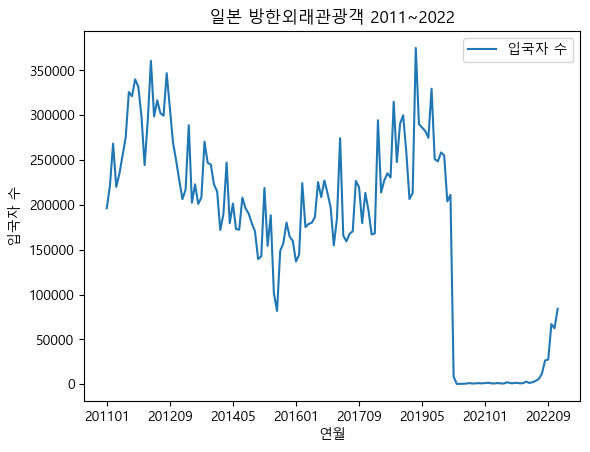

In [3]:
# API 호출 url, key
serviceKey = '***********************'
url = 'http://openapi.tour.go.kr/openapi/service/EdrcntTourismStatsService/getEdrcntTourismStatsList' 

# 입력부
print("<< 국내 입국한 외국인의 통계 데이터를 수집합니다. >>")
NAT_CD = input('국가 코드를 입력하세요(중국: 112 / 일본: 130 / 미국: 275) :')
nStartYear = input('데이터를 몇 년부터 수집할까요? : ')
nEndYear = input('데이터를 몇 년까지 수집할까요? : ')

# 방한 관광객수 수집 : 강의자료 코드 참조
result = [] 
for year in range(int(nStartYear), int(nEndYear)+1):  
    for month in range(1, 13):
        yyyymm = "{0}{1:0>2}".format(year, month)
        params ={'serviceKey' : serviceKey, 'YM' : yyyymm, 'NAT_CD' : NAT_CD, 'ED_CD' : 'E', '_type' : 'json' } 
        response = requests.get(url, params=params)
        jsonData = response.json()
        if (jsonData['response']['header']['resultMsg'] == 'OK'):
            natCd = jsonData['response']['body']['items']['item']['natCd']
            natName = jsonData['response']['body']['items']['item']['natKorNm']
            natName = natName.replace(' ', '')
            num = jsonData['response']['body']['items']['item']['num'] 
            result.append([natName, natCd, yyyymm, num])

# result를 dataframe화하기   
columns = ["입국자국가", "국가코드", "입국연월", "입국자 수"] 
result_df = pd.DataFrame(result, columns = columns)

# dataframe을 시각화하기 위해 필요없는 열 드랍
result_df1 = result_df.drop(['입국자국가', '국가코드'], axis=1) 

# dataframe으로 시각화
result_df1.plot(x='입국연월',y='입국자 수')
title = '%s 방한외래관광객 %s~%s' % (natName, nStartYear, nEndYear) 
plt.title(title)
plt.xlabel("연월")
plt.ylabel("입국자 수")
plt.show()

# 실습3
전국에 있는 읍면동 중 만 0세 이상 6세 이하의 인구 비율이 가장 높은 5곳의 인구구조를 꺽은선그래프로 시각화
- (pandas 라이브러리 이용, week6의 '궁금한 지역과 가장 비슷한 인구구조를 가진 지역을 시각화' 참고)

<Axes: >

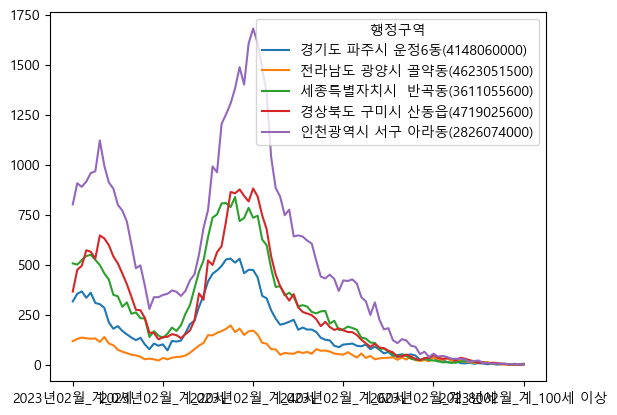

In [4]:
# 데이터 로딩(2월 기준 인구분포)
df = pd.read_csv('./age_no_comma.csv', index_col = 0, encoding ='cp949') 

#0세~6세열을 행방향합하여 0-6세 총인구수 구함
df['0_6세인구총합'] = df.iloc[:,2:9].sum(axis = 1) 

#총 인구수로 0-6세 인구 비율을 구함
df['0_6세인구비율'] = df['0_6세인구총합'] / df['2023년02월_계_총인구수'] 

# 0~6세 인구비율 기준으로 내림차순 정렬 후 top 5 선정
top5_0to6 = df.sort_values(by = '0_6세인구비율', ascending = False).head(5)

# 인구 분포를 나타내는 열만 추출 : 2023년02월_계_{어떠한 정수}세의 규칙을 갖춘 열만 추출
top5_0to6_dist = top5_0to6.columns[top5_0to6.columns.str.contains('2023년02월_계_'+'[\d]')] # 정규표현 메타문자 사용
top5_0to6 = top5_0to6[top5_0to6_dist]

# 0~6세 인구비율 top 5 인구 분포 시각화 : 별도의 형식제한이 없어서 6주차 강의자료 p62 형식대로 시각화하였습니다
top5_0to6.T.plot()